In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Car price dataset like last week. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll work with the `MSRP` variable, and we'll transform it to a classification task. 

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`
* `MSRP`


### Data preparation

* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0 
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


In [5]:
!ls

04-evaluation.ipynb  car_price.csv  homework.md


In [6]:
df = pd.read_csv('car_price.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
df.fillna(0, inplace = True) 

df.head().T


,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2.0,2.0,2.0,2.0,2.0
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance","luxury,performance",luxury


In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


# y_train = df_train.churn.values
# y_val = df_val.churn.values
# y_test = df_test.churn.values

# del df_train['churn']



### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `engine_hp`
- `engine_cylinders`
- `highway_mpg`
- `city_mpg`

Answer: engine_cylinders


In [8]:
numerical = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'msrp']

categorical = list(df.dtypes[df.dtypes == 'object'].index)
print (categorical)


['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


y_col='engine_hp'
  - y_avg = 247.94174920261878
  - auc_val=0.976029289859077
y_col='engine_cylinders'
  - y_avg = 5.614655027698506
  - auc_val=0.9829153365458094
y_col='highway_mpg'
  - y_avg = 26.637485311398354
  - auc_val=0.8903290806877645
y_col='city_mpg'
  - y_avg = 19.73325499412456
  - auc_val=0.9782947768626027


'engine_cylinders'

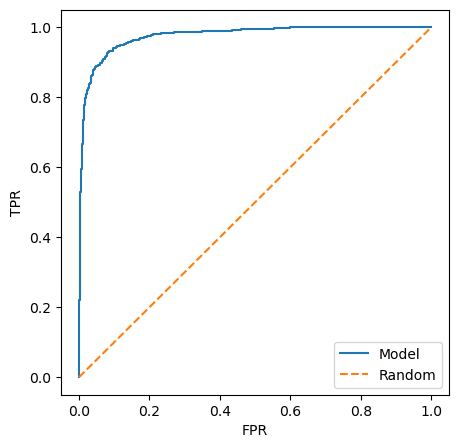

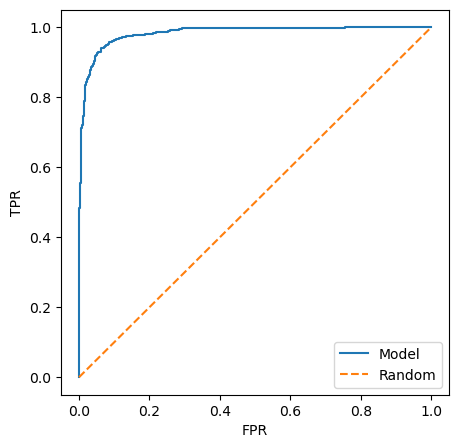

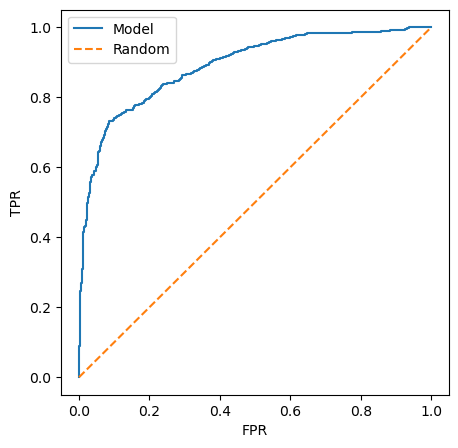

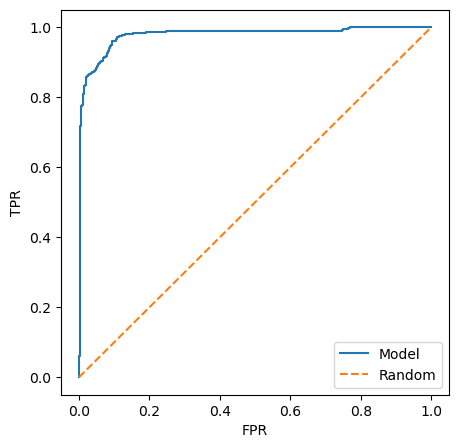

In [22]:
from sklearn.metrics import roc_curve, auc
dv = DictVectorizer(sparse=False)
auc_vals = {}

for y_col  in  ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']:
    print(f'{y_col=}')
    all_columns= categorical + numerical
    feature_columns = all_columns.copy()
    feature_columns.remove(y_col)


    train_dict = df_train[feature_columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    y_avg = df[y_col].values.mean()
    print(f'  - {y_avg = }')
    df_train['y_over_avg'] = np.where(df_train[y_col]>y_avg, 1, 0) 
    y_train = df_train['y_over_avg'].values    
    # print(y_train)

    model = LogisticRegression(max_iter=50000)  
    model.fit(X_train, y_train)
    ## model validation

    val_dict = df_val[feature_columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]
    # print(y_pred)
    df_val['y_over_avg'] = np.where(df_val[y_col]>y_avg, 1, 0) 
    y_val = df_val['y_over_avg'].values   
    # y_val, y_pred


    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    # [fpr, tpr, thresholds]
    auc_val = auc(fpr, tpr)
    auc_vals[y_col] = auc_val
    print(f'  - {auc_val=}')


    plt.figure(figsize=(5, 5))

    plt.plot(fpr, tpr, label='Model')
    plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')

    plt.legend()
    
max(auc_vals, key= lambda x: auc_vals[x] )





### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979

Answer: 0.983 ?

  - y_avg = 40594.737032063116


/tmp/ipykernel_14751/4115635632.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y_over_avg'] = np.where(df_train[y_col]>y_avg, 1, 0)


  - auc_val=0.9839960949316613


/tmp/ipykernel_14751/4115635632.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['y_over_avg'] = np.where(df_val[y_col]>y_avg, 1, 0)


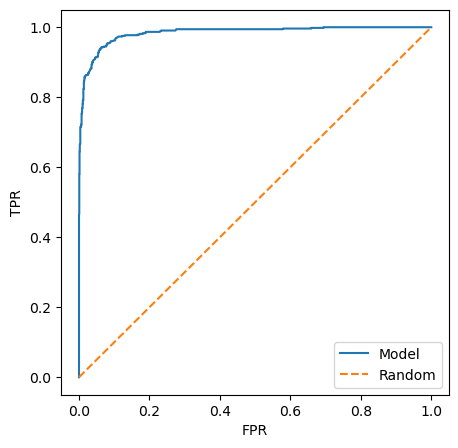

In [66]:

dv = DictVectorizer(sparse=False)

y_col = 'msrp'

all_columns= categorical + numerical
feature_columns = all_columns.copy()
feature_columns.remove(y_col)


train_dict = df_train[feature_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

y_avg = df[y_col].values.mean()
print(f'  - {y_avg = }')
df_train['y_over_avg'] = np.where(df_train[y_col]>y_avg, 1, 0) 
y_train = df_train['y_over_avg'].values    
# print(y_train)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)  
model.fit(X_train, y_train)
## model validation

val_dict = df_val[feature_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
# print(y_pred)
df_val['y_over_avg'] = np.where(df_val[y_col]>y_avg, 1, 0) 
y_val = df_val['y_over_avg'].values   
# y_val, y_pred


fpr, tpr, thresholds = roc_curve(y_val, y_pred)
# [fpr, tpr, thresholds]
auc_val = auc(fpr, tpr)
print(f'  - {auc_val=}')


plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()






### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

Answer: 0.48

In [47]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
        
    
    df_scores['prc'] = df_scores.tp / (df_scores.tp + df_scores.fp) # Precision tell us the fraction of positive predictions 
    df_scores['rcl'] = df_scores.tp / (df_scores.tp + df_scores.fn) # Recall measures the fraction of correctly identified postive instances.

    df_scores['f1'] = 2 *(df_scores.prc * df_scores.rcl) / (df_scores.prc + df_scores.rcl) 
      
    return df_scores

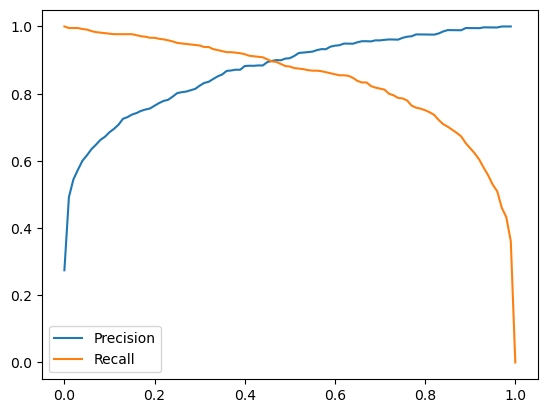

In [48]:
df_tp_fp = tpr_fpr_dataframe(y_val, y_pred)
df_tp_fp
plt.plot(df_tp_fp.threshold, df_tp_fp['prc'], label='Precision')
plt.plot(df_tp_fp.threshold, df_tp_fp['rcl'], label='Recall')
plt.legend()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

Answer: 0.32

threshold       0.400000
tp            600.000000
fp             80.000000
fn             54.000000
tn           1649.000000
tpr             0.917431
fpr             0.046270
prc             0.882353
rcl             0.917431
f1              0.899550
Name: 40, dtype: float64

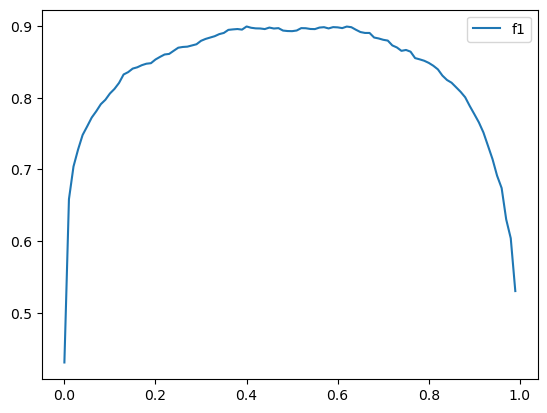

In [49]:
df_tp_fp = tpr_fpr_dataframe(y_val, y_pred)

plt.plot(df_tp_fp.threshold, df_tp_fp['f1'], label='f1')
plt.legend()

df_tp_fp.loc[df_tp_fp['f1'].idxmax()]


In [24]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [30]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


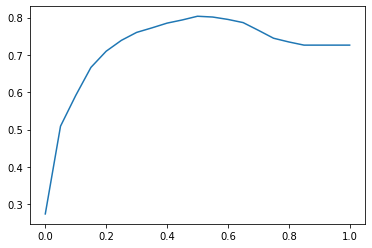

In [24]:
plt.plot(thresholds, scores)


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140

ANSWER: 0.003

In [80]:
# DOES NOT WORK - NEED TO CHECK
def transform_by_vectorizer(df:pd.DataFrame, dictvect:DictVectorizer = None):
    if dictvect is None:
        dictvect = DictVectorizer(sparse=False)

    y_col = 'msrp'

    all_columns= categorical + numerical
    feature_columns = all_columns.copy()
    feature_columns.remove(y_col)


    train_dict = df[feature_columns].to_dict(orient='records')
    X_features = dv.fit_transform(train_dict)
    return X_features, dictvect

    

def train(df_train:pd.DataFrame, y_train, C=1.0):    
    X_train, dv = transform_by_vectorizer(df_train)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)    
    return dv, model

def predict(df:pd.DataFrame, dv:DictVectorizer, model):
    X = transform_by_vectorizer(df, dv)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

# X, dv = transform_by_vectorizer(df_full_train)
# X.shape


In [86]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

n_splits = 5

y_col, y_col_bool  = ('msrp', 'y_over_avg')
y_avg = df_full_train[y_col].values.mean()
y_avg

df_full_train[y_col_bool] = np.where(df_full_train[y_col]>=y_avg, 1, 0)

all_columns= categorical + numerical
feature_columns = all_columns.copy()
feature_columns.remove(y_col)


kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train[y_col_bool].values
    y_val =  df_val[y_col_bool].values   
    

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[feature_columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    y_train = df_train.y_over_avg.values    
    # print(y_train)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)  
    model.fit(X_train, y_train)
    
    ## model validation
    val_dict = df_val[feature_columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]
    # print(y_pred)

    y_val = df_val.y_over_avg.values   
    # y_val, y_pred


    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    # [fpr, tpr, thresholds]
    auc_val = auc(fpr, tpr)
    print(f'  - {auc_val=}')

    
    scores.append(auc_val)

print('%.3f +- %.3f' % ( np.mean(scores), np.std(scores)))

0it [00:00, ?it/s]

[1 0 0 ... 0 0 0]
  - auc_val=0.9841183239975597
[1 0 0 ... 0 0 0]
  - auc_val=0.9858858717866572
[1 0 1 ... 1 1 1]
  - auc_val=0.9890165872802898
[1 0 0 ... 0 0 0]
  - auc_val=0.9872735307114449
[0 1 0 ... 0 0 0]
  - auc_val=0.9904062796274609
0.987 +- 0.002


In [98]:
y_pred = predict(df_val, dv, model)

In [99]:
from sklearn.model_selection import KFold

In [112]:
!pip install tqdm

You should consider upgrading via the '/home/alexey/.pyenv/versions/3.8.11/bin/python3.8 -m pip install --upgrade pip' command.


In [113]:
from tqdm.auto import tqdm


### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

10



In [87]:
for C in tqdm([ 0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train[y_col_bool].values
        y_val =  df_val[y_col_bool].values   


        dv = DictVectorizer(sparse=False)
        train_dict = df_train[feature_columns].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)
        y_train = df_train.y_over_avg.values    
        # print(y_train)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)  
        model.fit(X_train, y_train)

        ## model validation
        val_dict = df_val[feature_columns].to_dict(orient='records')
        X_val = dv.transform(val_dict)

        y_pred = model.predict_proba(X_val)[:, 1]
        # print(y_pred)

        y_val = df_val.y_over_avg.values   
        # y_val, y_pred


        fpr, tpr, thresholds = roc_curve(y_val, y_pred)
        # [fpr, tpr, thresholds]
        auc_val = auc(fpr, tpr)
        print(f'  - {auc_val=}')


        scores.append(auc_val)
    print(f'{C=}')
    print(' %.3f +- %.3f' % ( np.mean(scores), np.std(scores)))
    

  0%|          | 0/4 [00:00<?, ?it/s]

  - auc_val=0.9544790915645278
  - auc_val=0.95291700268446
  - auc_val=0.9558364361107383
  - auc_val=0.9576948705539072
  - auc_val=0.9603814622720428
C=0.01
 0.956 +- 0.003
  - auc_val=0.9752156009095446
  - auc_val=0.9755429679300935
  - auc_val=0.980574796502527
  - auc_val=0.9799900399104995
  - auc_val=0.9837655457029725
C=0.1
 0.979 +- 0.003
  - auc_val=0.9819567688980089
  - auc_val=0.9835093514212172
  - auc_val=0.987470789167673
  - auc_val=0.985590135302906
  - auc_val=0.9893480564385702
C=0.5
 0.986 +- 0.003
  - auc_val=0.98802132438578
  - auc_val=0.9899760828978911
  - auc_val=0.9919893834697437
  - auc_val=0.9894675560605741
  - auc_val=0.9920891194021528
C=10
 0.990 +- 0.002




## Submit the results

- Submit your results here: https://forms.gle/E7Fa3WuBw3HkPQYg6
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## 4.8 Summary

* Metric - a single number that describes the performance of a model
* Accuracy - fraction of correct answers; sometimes misleading 
* Precision and recall are less misleading when we have class inbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)